In [1]:
import numpy as np
import matplotlib.pyplot as plt

from guidance_utils import full_grid, geom_analysis, optimal_weights
from toy_math import ToyModel

%load_ext autoreload
%autoreload 2

# Guidance

In [2]:
# Triangle
data = np.array([[0, 0], [2, 0], [1, 1.73205]])
data -= np.array([1, 0.57735])
data *= 0.75
data_labels = [0,1,2]  # One label per data point

# # Gaussian cloud
# mu, var, n = np.array([0,0]), 1, 10
# cov = np.diag(np.array([var, var])**2)
# data = np.random.multivariate_normal(np.array(mu), cov, n)
# data_labels = list(range(n))  # One label per data point

# Setup 
dim = data.shape[1]
num_steps, sigma_min, sigma_max, rho = 40, 2e-3, 80, 7

## Full analysis

Set the network endpoint errors `'delta'` for both networks and enable conditioning for the positive model via `'cond'` to simulate CFG. This will assign each data point its own class label. 

100%|██████████| 40/40 [00:00<00:00, 3211.50it/s]


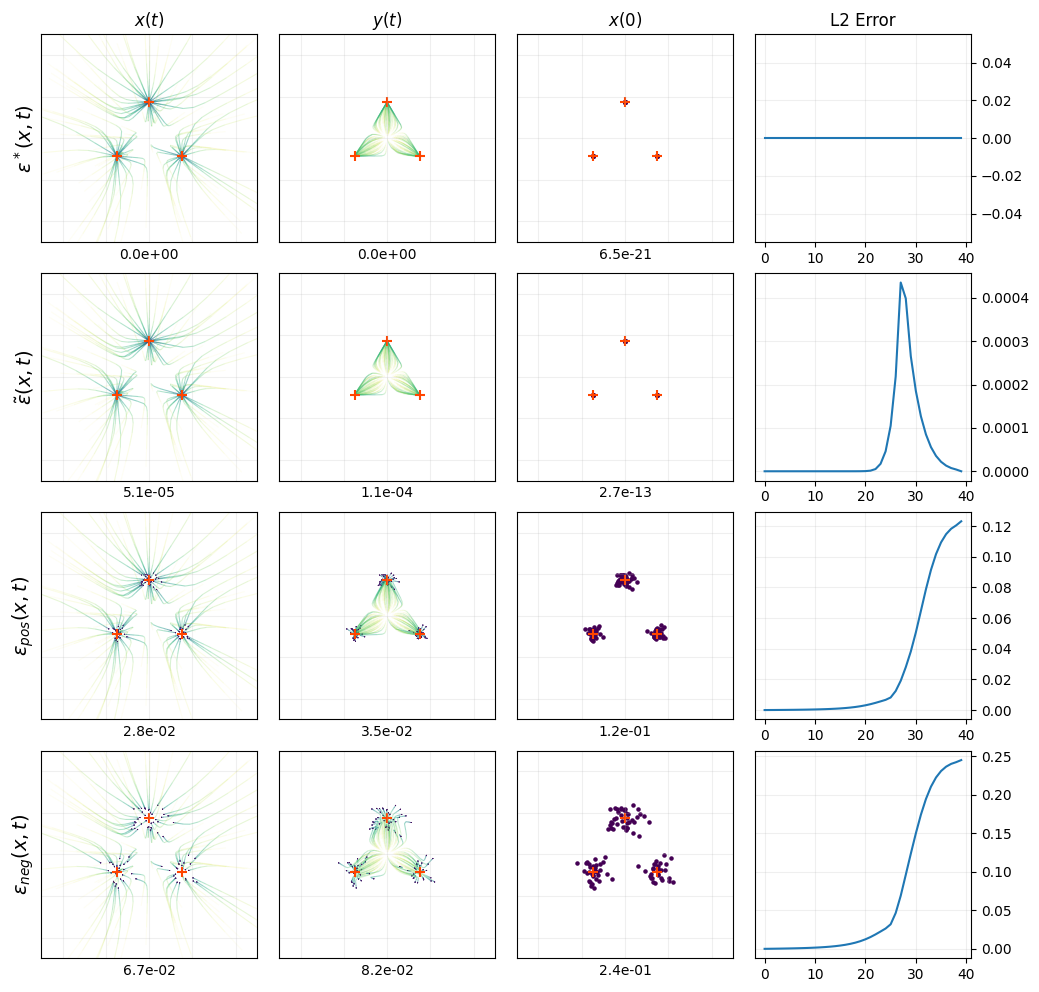

In [3]:
model = ToyModel(data=data, 
                 data_labels=data_labels, 
                 num_steps=num_steps, 
                 sigma_min=sigma_min, 
                 sigma_max=sigma_max, 
                 rho=rho, 
                 pos_kwargs={'delta': 1e-1, 'cond': False},  # positive network 
                 neg_kwargs={'delta': 2e-1, 'cond': False},  # negative network
                 heun=False)

out = full_grid(model=model, 
                x_labels=None,                     # Labels for trajectories 
                n=100,                             # number of trajectories
                m=100,                             # how many to plot
                guid_weight='opt_weight',          # guidance weight, float or 'opt_weight'
                interval=None,                     # guidance interval
                init='random',                     # Initialization mode
                save_as=None)

## Geometric analysis

Zoomed in on a single trajectory. Set up for the triangle data. If you change the data or choose different initializations for the trajectory, adjust the `xlim` and `ylim` of the plots.

In [4]:
# Triangle
data = np.array([[0, 0], [2, 0], [1, 1.73205]])
data -= np.array([1, 0.57735])
data *= 0.75
data_labels = [0,1,2]  # One label per data point

# # Gaussian cloud
# mu, var, n = np.array([0,0]), 1, 10
# cov = np.diag(np.array([var, var])**2)
# data = np.random.multivariate_normal(np.array(mu), cov, n)
# data_labels = list(range(n))  # One label per data point

# Setup 
dim = data.shape[1]
num_steps, sigma_min, sigma_max, rho = 120, 2e-3, 80, 7

100%|██████████| 120/120 [00:00<00:00, 2548.48it/s]

Opt weight = 0.59


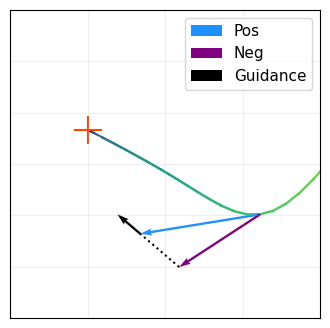

In [5]:
model = ToyModel(data=data, 
                 data_labels=data_labels, 
                 num_steps=num_steps, 
                 sigma_min=sigma_min, 
                 sigma_max=sigma_max, 
                 rho=rho, 
                 pos_kwargs = {'delta': 2e-1, 'cond': False},  # positive network
                 neg_kwargs = {'delta': 4e-1, 'cond': False},  # negative network
                 heun=False)

plt.figure(figsize=(4,4))
geom_analysis(model=model, 
              x_labels=None, 
              guid_weight='opt_weight', 
              interval=None, 
              steps=[78], 
              init=np.stack([np.array([50,60])]),
              legend=True)

plt.xlim([-0.2, 0.6])
plt.ylim([0.5, 1.1])
plt.grid(alpha=0.2)
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False)

del model

100%|██████████| 120/120 [00:00<00:00, 3725.04it/s]


Opt weight = 1.40


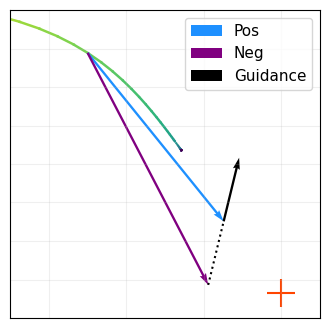

In [6]:
num_steps, sigma_min, sigma_max, rho = 120, 2e-3, 80, 7

model = ToyModel(data=data, 
                 data_labels=data_labels, 
                 num_steps=num_steps, 
                 sigma_min=sigma_min, 
                 sigma_max=sigma_max, 
                 rho=rho, 
                 pos_kwargs = {'delta': 5e-1, 'cond': True},  # positive network
                 neg_kwargs = {'delta': 5e-1, 'cond': False},  # negative network
                 heun=False)

plt.figure(figsize=(4,4))
geom_analysis(model=model, 
              x_labels=[2], 
              guid_weight=1, 
              interval=None, 
              steps=[74], 
              init=np.stack([np.array([-50,0])]),
              legend=True)

plt.xlim([-0.7, 0.1])
plt.ylim([0.8, 1.6])
plt.grid(alpha=0.2)
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False)

del model

## Optimal Weight

Compute and plot the average step-wise optimal weight for 100 trajectories, for different $\delta_{\text{neg}}$.

In [7]:
# Triangle
data = np.array([[0, 0], [2, 0], [1, 1.73205]])
data -= np.array([1, 0.57735])
data *= 0.75
data_labels = [0,1,2]  # One label per data point

# Setup 
dim = data.shape[1]
num_steps, sigma_min, sigma_max, rho = 40, 2e-3, 80, 7

In [8]:
def opt_weight_setup():
    xticks = list(range(0, 45, 5))
    xlabels = xticks.copy()
    xlabels[-1] = "$n_{{steps}}$"
    plt.xticks(xticks, xlabels)
    
    plt.legend()
    plt.yscale('log')
    plt.ylim([1e-4, 1e4])

100%|██████████| 40/40 [00:00<00:00, 2198.70it/s]


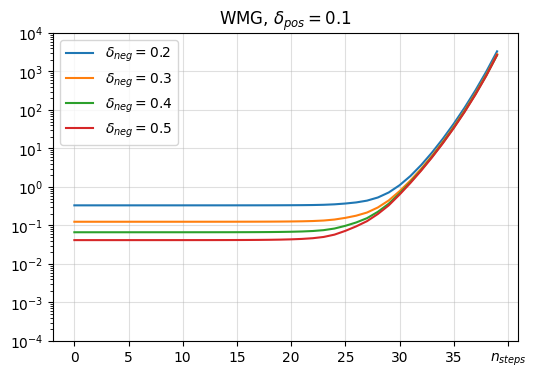

100%|██████████| 40/40 [00:00<00:00, 1427.42it/s]


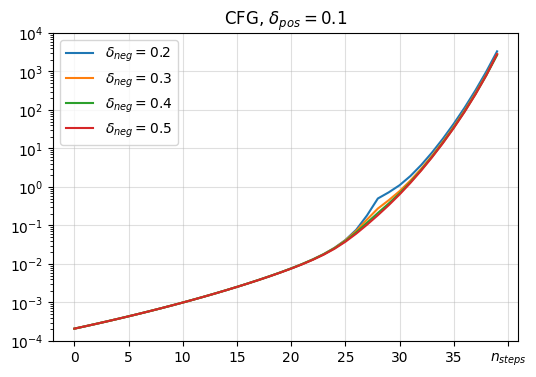

In [9]:
eps_pos = 1e-1

conds = [False, True]
titles = [f'WMG, $\\delta_{{pos}} = {eps_pos}$', 
          f'CFG, $\\delta_{{pos}} = {eps_pos}$']
for cond, title in zip(conds, titles):
    plt.figure(figsize=(6,4))
    plt.title(title)
    plt.grid(alpha=0.4)
    for eps_neg in [2e-1, 3e-1, 4e-1, 5e-1]:
        model = ToyModel(data=data, 
                         data_labels=data_labels, 
                         num_steps=num_steps, 
                         sigma_min=sigma_min, 
                         sigma_max=sigma_max, 
                         rho=rho, 
                         pos_kwargs = {'delta': eps_pos, 'cond': cond},  # positive network 
                         neg_kwargs = {'delta': eps_neg, 'cond': False},  # negative network
                         heun=False)
    
        optimal_weights(model=model, 
                        x_labels=None, 
                        guid_weight='opt_weight', 
                        interval=None, 
                        init='random',
                        n=100)
        
    opt_weight_setup()
    plt.show()